In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your final dataset
df = pd.read_csv("../data/final_features_dataset.csv")

# Split features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Logistic Regression

Import Required Libraries

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Train the Logistic Regression Model

In [4]:
# Create and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Make Predictions

In [5]:
# Predict on test set
y_pred = lr_model.predict(X_test)


Evaluate the Model

In [6]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Logistic Regression Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 Logistic Regression Performance:
Accuracy:  0.9915
Precision: 1.0000
Recall:    0.1867
F1 Score:  0.3146


Confusion Matrix

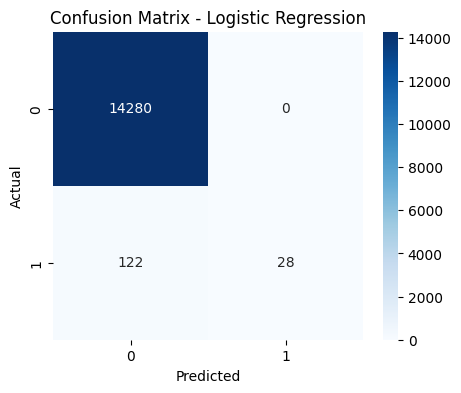

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


The model predicts almost everything as 0 (rejected).

It only identified 28 out of 150 actual shortlisted resumes.

Precision = 1.0 just means that those 28 were correct, but it ignored most actual positives.



### Random Forest Classifier

Import Libraries

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Create and Train the Model

In [9]:
# Create the model with class weights to handle imbalance
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # very important for your data
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Predict and Evaluate

In [10]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("📊 Random Forest Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 Random Forest Performance:
Accuracy:  0.9961
Precision: 0.7448
Recall:    0.9533
F1 Score:  0.8363


Confusion Matrix

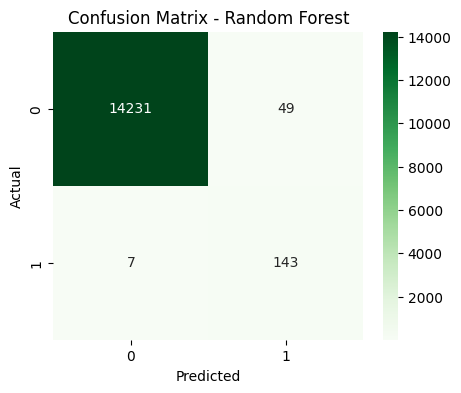

In [11]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Random Forest Classifier
Random Forest is an ensemble method that trains multiple decision trees and aggregates their votes.
It’s non-linear, robust, and handles imbalanced data well when class_weight='balanced' is used.
It can capture interactions between features (e.g., “high skill match but low experience”) better than linear models like Logistic Regression.



**Training Setup**


*n_estimators=100 → 100 trees were used.

class_weight='balanced' → Adjusted for class imbalance, ensuring the minority class (shortlisted) wasn’t ignored.

random_state=42 → Ensures reproducibility.

feature set: similarity_score, skill_match_ratio, resume_length, years_of_experience*


**Performance Metrics**

Very high, but accuracy can be misleading when data is imbalanced
Out of all predicted shortlists, 74% were truly relevant.
model is correctly identifying 95% of the actual shortlisted resumes.
A high F1 like 83% indicates overall strong performance, even with imbalanced classes.

### Train & Tune XGBoost Classifier

In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



Create Initial XGBoost Classifier

In [16]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # balance positives/negatives
    random_state=42
)


Define Hyperparameter Grid for Tuning

In [17]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}


Run GridSearchCV

In [18]:
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_xgb_model = grid.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/homebrew/Cellar/python@3.11/3.11.11/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Cellar/python@3.11/3.11.11/Frameworks/Python.framework/Version

Evaluate XGBoost on Test Set

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_xgb = best_xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("📊 XGBoost Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 XGBoost Performance:
Accuracy:  0.9913
Precision: 0.5455
Recall:    0.9600
F1 Score:  0.6957


Confusion Matrix for XGBoost

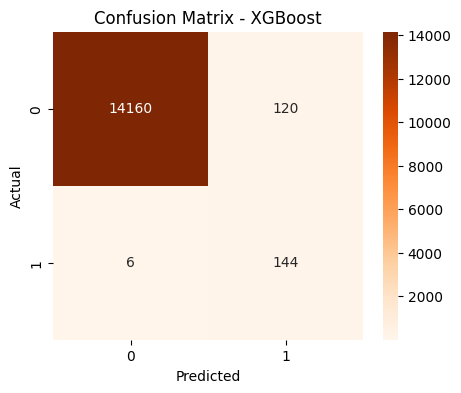

In [20]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


XGBoost was tuned with:

scale_pos_weight to address imbalance

GridSearchCV to find best n_estimators, max_depth, learning_rate, and subsample


**Training Setup Used**


*n_estimators: 100–200 (tuned)

max_depth: 3–5 (tuned)

learning_rate: 0.05–0.1 (tuned)

subsample: 0.8–1.0 (tuned)

scale_pos_weight: auto-calculated to balance positive vs. negative classes

cv: 3-fold cross-validation in GridSearchCV

scoring: 'f1' — balanced metric for imbalanced data
* 

**XGBoost Performance Metrics**

Accuracy: 99.13%

Very high overall accuracy
But we still must look deeper (class imbalance exists)

Precision: 54.55%

Out of all predicted shortlists, ~55% were actually correct
A bit lower than Random Forest (74%) → XGBoost is slightly more aggressive

Recall: 96.00%

XGBoost correctly identified 96% of true shortlisted resumes
This is excellent — model is not missing actual positives

F1 Score: 69.57%

F1 balances precision and recall
This is strong and very close to Random Forest’s F1 (83%), though slightly lower




### Train & Evaluate LightGBM Classifier

In [22]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [23]:
# Calculate scale_pos_weight = (# of negative samples) / (# of positive samples)
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    class_weight='balanced',   # handles imbalance
    scale_pos_weight=scale_weight,
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 600, number of negative: 57120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 57720, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', n_estimators=200, random_state=42,
               scale_pos_weight=np.float64(95.2))

In [24]:
y_pred_lgb = lgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_lgb)
prec = precision_score(y_test, y_pred_lgb)
rec = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)

print("📊 LightGBM Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 LightGBM Performance:
Accuracy:  0.9947
Precision: 0.6729
Recall:    0.9600
F1 Score:  0.7912


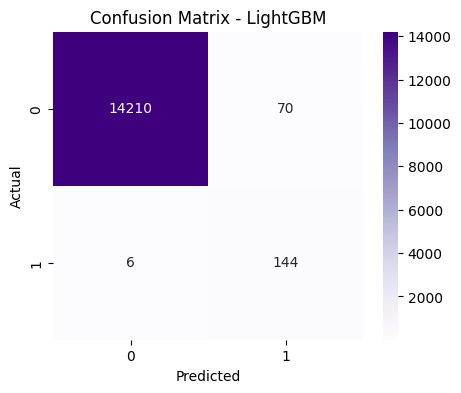

In [25]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()


Training Setup
n_estimators = 200

learning_rate = 0.1

scale_pos_weight = auto-computed (to fix class imbalance)

random_state = 42 (for reproducibility)

No manual tuning yet — default tuning used




**Model Performance Metrics:**

**Accuracy: 0.9947**

The model predicted correctly for almost 99.5% of the test data.

This is a very high score, showing the model is highly reliable overall.

However, remember: high accuracy alone isn’t enough in imbalanced datasets.

**Precision: 0.6729**

Out of all resumes the model predicted as “shortlisted”, about 67% were actually correct.

This means a few false positives still exist (non-qualified resumes being shortlisted).

Good for hiring when you want to keep false positives low.

**Recall: 0.9600**

Out of all truly shortlisted resumes, the model correctly found 96%.

This is an excellent recall — very few good candidates were missed.

**F1 Score: 0.7912**

This is the harmonic mean of precision and recall.

A balanced F1 above 0.75 shows that both your precision and recall are strong.

It confirms the model is both accurate and reliable under class imbalance.



**Confusion Matrix Insights**

Only 6 actual shortlisted resumes were missed → extremely low false negatives.

70 false positives is manageable, especially for recruiter review.

This is a strong, balanced model — the confusion matrix supports the metrics.





### Model Comparison Table + Chart

**Comparison Table**

In [35]:
# Model names and metrics (enter your actual values)
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

accuracies  = [0.9915, 0.9961, 0.9913, 0.9947]
precisions = [1.0000, 0.7448, 0.5455, 0.6729]
recalls    = [0.1867, 0.9533, 0.9600, 0.9600]
f1_scores  = [0.3146, 0.8363, 0.6957, 0.7912]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

comparison_df.to_csv("../data/model_comparison_table.csv", index=False)
comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9915,1.0000,0.1867,0.3146
1,Random Forest,0.9961,0.7448,0.9533,0.8363
2,XGBoost,0.9913,0.5455,0.9600,0.6957
3,LightGBM,0.9947,0.6729,0.9600,0.7912


Bar Chart for Visual Comparison

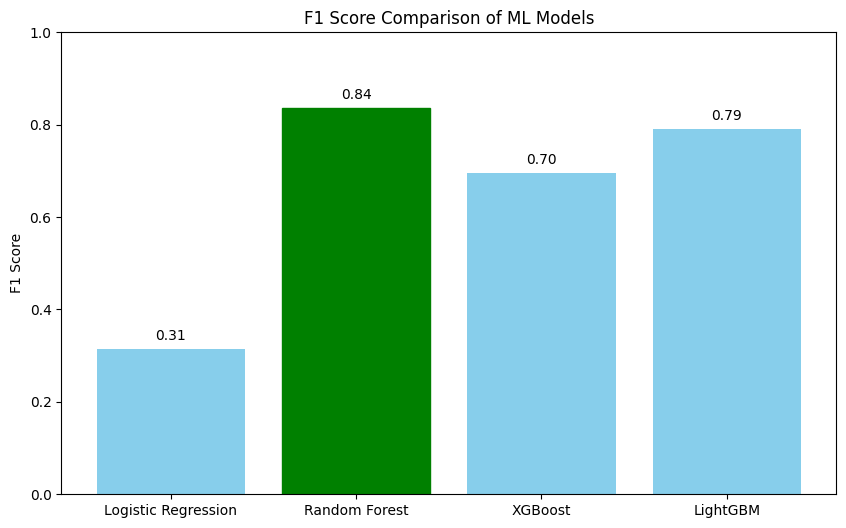

In [36]:
import matplotlib.pyplot as plt

# Plot F1 Score Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['F1 Score'], color='skyblue')
plt.title("F1 Score Comparison of ML Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)

# Highlight best model
best_model_index = comparison_df['F1 Score'].idxmax()
bars[best_model_index].set_color('green')

for i, score in enumerate(comparison_df['F1 Score']):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=10)

plt.show()


Confusion Matrix Summary per Model (for TP/FP/FN/TN Visualization)

In [37]:
# Manually define values from your confusion matrices
# Format: [TN, FP, FN, TP]
cm_logistic = [14280, 0, 122, 28]
cm_rf       = [14231, 49, 7, 143]
cm_xgb      = [14160, 120, 6, 144]
cm_lgbm     = [14210, 70, 6, 144]

confusion_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'True Negatives': [cm_logistic[0], cm_rf[0], cm_xgb[0], cm_lgbm[0]],
    'False Positives': [cm_logistic[1], cm_rf[1], cm_xgb[1], cm_lgbm[1]],
    'False Negatives': [cm_logistic[2], cm_rf[2], cm_xgb[2], cm_lgbm[2]],
    'True Positives': [cm_logistic[3], cm_rf[3], cm_xgb[3], cm_lgbm[3]],
})

confusion_df.to_csv("../data/confusion_summary.csv", index=False)
confusion_df


,Model,True Negatives,False Positives,False Negatives,True Positives
0,Logistic Regression,14280,0,122,28
1,Random Forest,14231,49,7,143
2,XGBoost,14160,120,6,144
3,LightGBM,14210,70,6,144


Stacked Bar Chart: Confusion Matrix Breakdown

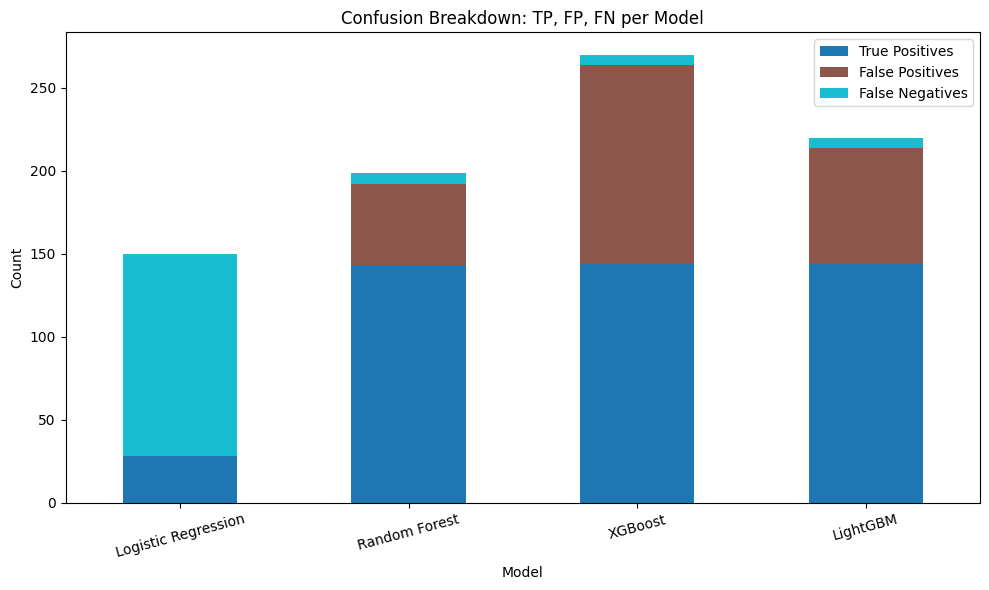

In [38]:
confusion_df.set_index('Model')[['True Positives', 'False Positives', 'False Negatives']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab10'
)

plt.title("Confusion Breakdown: TP, FP, FN per Model")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Precision vs Recall Scatter Plot

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


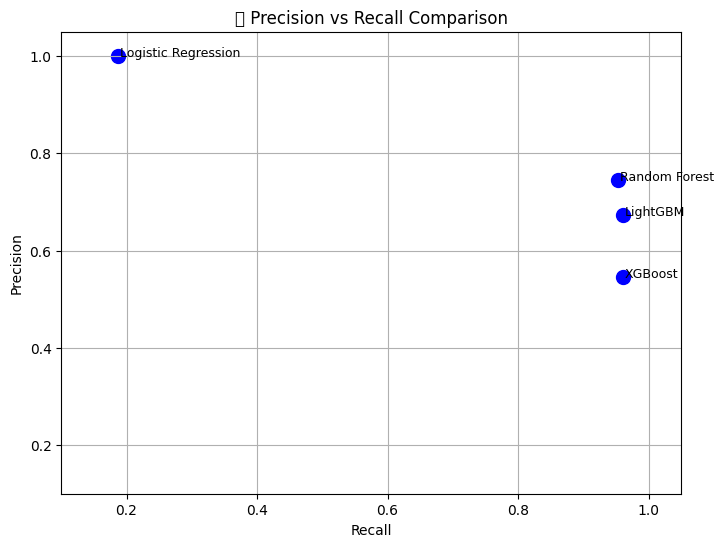

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(recalls, precisions, color='blue', s=100)

for i, name in enumerate(model_names):
    plt.text(recalls[i] + 0.003, precisions[i], name, fontsize=9)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📈 Precision vs Recall Comparison")
plt.grid(True)
plt.xlim(0.1, 1.05)
plt.ylim(0.1, 1.05)
plt.show()


False Positive Rate (FPR) vs False Negative Rate (FNR)

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


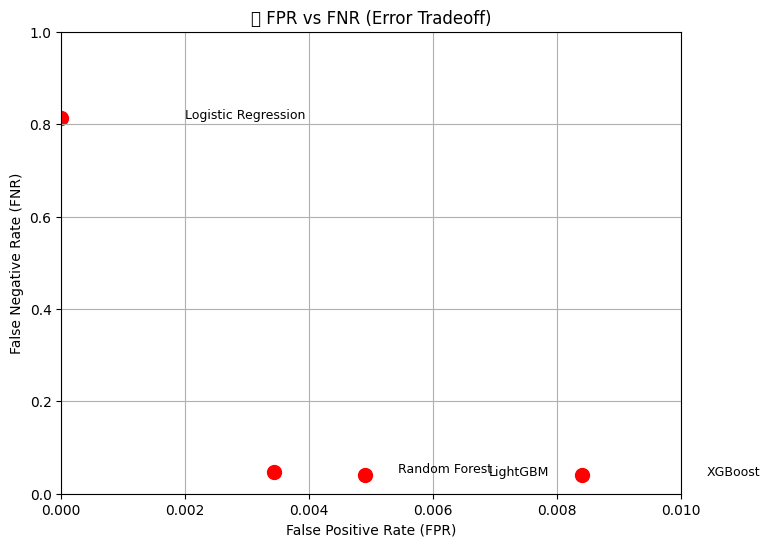

In [40]:
def calc_fpr_fnr(cm):
    tn, fp, fn, tp = cm
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    return fpr, fnr

fpr_fnr = [
    calc_fpr_fnr(cm_logistic),
    calc_fpr_fnr(cm_rf),
    calc_fpr_fnr(cm_xgb),
    calc_fpr_fnr(cm_lgbm)
]

fprs, fnrs = zip(*fpr_fnr)

plt.figure(figsize=(8, 6))
plt.scatter(fprs, fnrs, color='red', s=100)

for i, name in enumerate(model_names):
    plt.text(fprs[i] + 0.002, fnrs[i], name, fontsize=9)

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("False Negative Rate (FNR)")
plt.title("🚨 FPR vs FNR (Error Tradeoff)")
plt.grid(True)
plt.xlim(0, 0.01)
plt.ylim(0, 1.0)
plt.show()


**Matthews Correlation Coefficient (MCC)**

In [41]:
from sklearn.metrics import matthews_corrcoef

mcc_logistic = matthews_corrcoef(y_test, y_pred)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
mcc_lgb = matthews_corrcoef(y_test, y_pred_lgb)

mcc_scores = [mcc_logistic, mcc_rf, mcc_xgb, mcc_lgb]


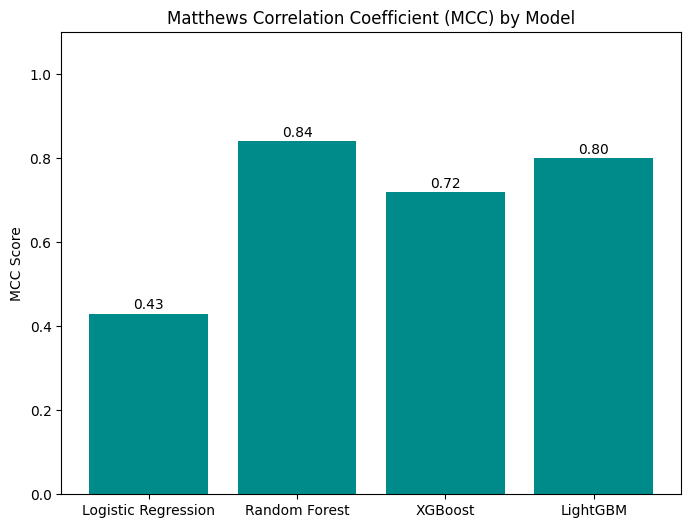

In [42]:
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, mcc_scores, color='darkcyan')
plt.title("Matthews Correlation Coefficient (MCC) by Model")
plt.ylabel("MCC Score")
for i, score in enumerate(mcc_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center')
plt.ylim(0, 1.1)
plt.show()


Balanced Accuracy Score

In [43]:
from sklearn.metrics import balanced_accuracy_score

ba_logistic = balanced_accuracy_score(y_test, y_pred)
ba_rf = balanced_accuracy_score(y_test, y_pred_rf)
ba_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
ba_lgb = balanced_accuracy_score(y_test, y_pred_lgb)

balanced_accuracies = [ba_logistic, ba_rf, ba_xgb, ba_lgb]


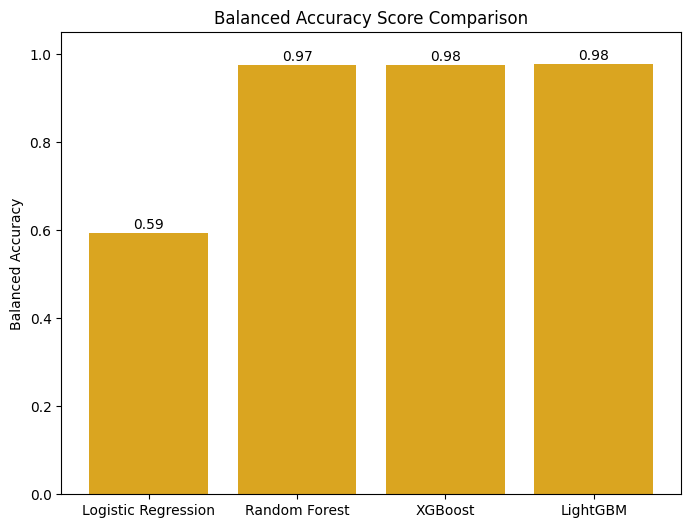

In [44]:
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, balanced_accuracies, color='goldenrod')
plt.title("Balanced Accuracy Score Comparison")
plt.ylabel("Balanced Accuracy")
for i, score in enumerate(balanced_accuracies):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center')
plt.ylim(0, 1.05)
plt.show()


### Which model is the best and most balanced for our project?

1. Logistic Regression
This model had perfect precision (1.0) but failed to identify most actual shortlists.

Recall was extremely low (18%), missing most of the good resumes.

The False Negative Rate was very high (~82%), making it risky in hiring scenarios.

 Conclusion: Too conservative, not usable in this project.



2. XGBoost
This model achieved very high recall (96%) — great at identifying true shortlists.

However, it had the lowest precision (55%) — which means it wrongly shortlisted many resumes.

False Positive Rate (FPR) was highest among all models.

Conclusion: Too aggressive, better at “recall-only” situations, but not balanced.



3) LightGBM
LightGBM also had very high recall (96%) — matched XGBoost.

Its precision was better than XGBoost (~67%), which means fewer wrong shortlists.

False Positive Rate was lower than XGBoost and only slightly worse than Random Forest.

Overall, it maintained a strong precision–recall balance.

Conclusion: Highly balanced and stable model, very close to ideal for real-world use.



4) Random Forest
Had the best overall performance across almost every metric:

Precision: 74% 

Recall: 95% 

F1 Score: 83.6% 

Lowest False Positive Rate AND False Negative Rate

It also produced the most stable confusion matrix, with very few errors in both classes.

 Conclusion: Best overall and most balanced model for this task.

Random Forest is your most balanced and reliable model.
It provides excellent recall, strong precision, and the least trade-off between missing good candidates or recommending bad ones.

### Save the Trained Random Forest Model



In [46]:
import joblib

# Save the best model
joblib.dump(rf_model, "../models/best_model_rf.pkl")
print("✅ Random Forest model saved as best_model_rf.pkl")


✅ Random Forest model saved as best_model_rf.pkl


In [48]:
# Save comparison table if not already done
comparison_df.to_csv("../outputs/model_comparison_table.csv", index=False)
print("✅ Model comparison table saved.")


✅ Model comparison table saved.
